In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [7]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [18]:
n=20
lam0=3
lam1=(1/np.mean(my_data)) #1/x_bar
sumx=np.sum(my_data)
test_stat=-2*log((lam0**n*e**(-lam0*sumx))/(lam1**n*e**(-lam1*sumx)))
print(test_stat)
print(1-stats.chi2.cdf(test_stat,1))

4.7192223601884615
0.029827229194775096


#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [20]:
crit=stats.chi2.ppf(0.95,1)
crit

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [30]:
data=[]
for i in np.arange(1000):
    sample=stats.expon.rvs(scale=1/5,size=20)
    lam0=3
    n=20
    sumx=np.sum(sample)
    lam1=1/np.mean(sample)
    ts=-2*log((lam0**n*e**(-lam0*sumx))/(lam1**n*e**(-lam1*sumx)))
    data=np.append(data,ts)

(array([245., 252., 230., 141.,  85.,  23.,  11.,  11.,   1.,   1.]),
 array([9.18065719e-06, 2.46814925e+00, 4.93628932e+00, 7.40442940e+00,
        9.87256947e+00, 1.23407095e+01, 1.48088496e+01, 1.72769897e+01,
        1.97451298e+01, 2.22132698e+01, 2.46814099e+01]),
 <a list of 10 Patch objects>)

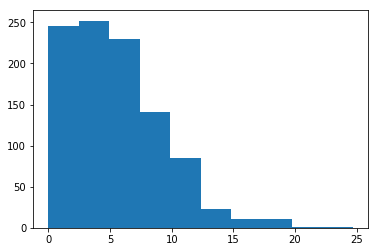

In [31]:
plt.hist(data)

In [34]:
print(np.mean(data))
print(np.mean(data>=crit))

5.536000142652123
0.611


Repeat for a sample size of 50. What do you expect to happen to power? 

In [43]:
data=[]
for i in np.arange(1000):
    sample=stats.expon.rvs(scale=1/5,size=50)
    lam0=3
    n=50
    sumx=np.sum(sample)
    lam1=1/np.mean(sample)
    ts=-2*log((lam0**n*e**(-lam0*sumx))/(lam1**n*e**(-lam1*sumx)))
    data=np.append(data,ts)

(array([ 53., 192., 253., 232., 132.,  85.,  32.,  13.,   4.,   4.]),
 array([ 0.62042873,  4.28200259,  7.94357645, 11.60515031, 15.26672417,
        18.92829803, 22.58987189, 26.25144575, 29.91301961, 33.57459347,
        37.23616733]),
 <a list of 10 Patch objects>)

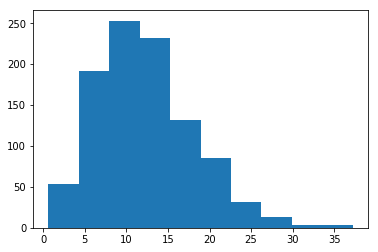

In [44]:
plt.hist(data)

In [42]:
print(np.mean(data))
print(np.mean(data>=crit))

12.064480248946708
0.954


### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

In [4]:
...

Ellipsis

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [5]:
...

Ellipsis

Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [6]:
...

Ellipsis

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [7]:
...

Ellipsis